In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# buy & hold

In [ ]:
## 주식 전체 마켓캡, 날짜 수집
import pandas as pd
path = '/content/drive/MyDrive/0_Capstone/data/merged_trend/MKTCAP포함/'
file_names = [
    "new_KR7005930003_preprocessed.csv",
    "new_KR7000250001_preprocessed.csv",
    "new_KR7036570000_preprocessed.csv",
    "new_KR7051910008_preprocessed.csv",
    "new_KR7066700006_preprocessed.csv",
    "new_KR7066970005_preprocessed.csv",
    "new_KR7068760008_preprocessed.csv",
    "new_KR7078600004_preprocessed.csv",
    "new_KR7096770003_preprocessed.csv",
    "new_KR7128940004_preprocessed.csv",
    "new_KR7185750007_preprocessed.csv",
    "new_KR7192080000_preprocessed.csv",
    "new_KR7207940008_preprocessed.csv",
    "new_KR7225570001_preprocessed.csv",
    "new_KR7247540008_preprocessed.csv",
    "new_KR7251270005_preprocessed.csv",
    "new_KR7263750002_preprocessed.csv",
    "new_KR7293490009_preprocessed.csv",
    "new_KR7373220003_preprocessed.csv",
]


def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

data_list = []

for file_name in file_names:
    df = load_data(path + file_name)
    df['Date'] = pd.to_datetime(df['TRD_DD'])
    # Get the stock name from file_name (assuming format remains consistent)
    stock_name = file_name.split('_')[1].split('.')[0]

    # Append each row for the stock to the list
    for index, row in df.iterrows():
        data_list.append({'Stock': stock_name, 'Date': row['Date'], 'MKTCAP': row['MKTCAP']})

# Construct the DataFrame after appending data
total_stocks = pd.DataFrame(data_list)

display(total_stocks.head())
print(total_stocks['Stock'].unique())

,Stock,Date,MKTCAP
0,KR7005930003,1995-05-02,6497053077500
1,KR7005930003,1995-05-03,6714527657500
2,KR7005930003,1995-05-04,6660159012500
3,KR7005930003,1995-05-06,6632974690000
4,KR7005930003,1995-05-08,6578606045000


['KR7005930003' 'KR7000250001' 'KR7036570000' 'KR7051910008'
 'KR7066700006' 'KR7066970005' 'KR7068760008' 'KR7078600004'
 'KR7096770003' 'KR7128940004' 'KR7185750007' 'KR7192080000'
 'KR7207940008' 'KR7225570001' 'KR7247540008' 'KR7251270005'
 'KR7263750002' 'KR7293490009' 'KR7373220003']


In [ ]:
total_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61916 entries, 0 to 61915
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Stock   61916 non-null  object        
 1   Date    61916 non-null  datetime64[ns]
 2   MKTCAP  61916 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.4+ MB


In [ ]:
total_stocks
total_stocks.to_csv('/content/drive/MyDrive/0_Capstone/data/model_signal/서영_상대수익용/total_stocks(Stock,DATE,MKTCAP).csv', index=False)

In [ ]:
# 상대수익률 확인
ESN_rel = pd.read_csv('/content/drive/MyDrive/0_Capstone/data/model_signal/서영_상대수익용/ESN_relative_return.csv')
RNN_rel = pd.read_csv('/content/drive/MyDrive/0_Capstone/data/model_signal/서영_상대수익용/RNN_relative_return.csv')
Cls_rel = pd.read_csv('/content/drive/MyDrive/0_Capstone/data/model_signal/서영_상대수익용/Cls_relative_return.csv')

In [ ]:
ESN_rel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Stock            19 non-null     object 
 1   First Date       19 non-null     object 
 2   Last Date        19 non-null     object 
 3   stock_type       19 non-null     object 
 4   trade_days       19 non-null     float64
 5   market_return    19 non-null     float64
 6   stock_return     19 non-null     float64
 7   relative_return  19 non-null     float64
 8   diff_return      19 non-null     float64
dtypes: float64(5), object(4)
memory usage: 1.5+ KB


In [ ]:
# Convert 'First Date' and 'Last Date' columns to datetime format in _rel DataFrames
ESN_rel['First Date'] = pd.to_datetime(ESN_rel['First Date'])
ESN_rel['Last Date'] = pd.to_datetime(ESN_rel['Last Date'])
RNN_rel['First Date'] = pd.to_datetime(RNN_rel['First Date'])
RNN_rel['Last Date'] = pd.to_datetime(RNN_rel['Last Date'])
Cls_rel['First Date'] = pd.to_datetime(Cls_rel['First Date'])
Cls_rel['Last Date'] = pd.to_datetime(Cls_rel['Last Date'])

# Create empty DataFrames to store the extracted data for each model
total_stocks_test_ESN = pd.DataFrame()
total_stocks_test_RNN = pd.DataFrame()
total_stocks_test_Cls = pd.DataFrame()

# Iterate through each stock in _rel DataFrames
for model_df, model_name in zip([ESN_rel, RNN_rel, Cls_rel], ['ESN', 'RNN', 'Cls']):
    for index, row in model_df.iterrows():
        # Extract date range for each stock from total_stocks DataFrame
        stock_data = total_stocks[
            (total_stocks['Stock'] == row['Stock']) &
            (total_stocks['Date'] >= row['First Date']) &
            (total_stocks['Date'] <= row['Last Date'])
        ]

        # Append the extracted data to respective total_stocks_test DataFrames
        if model_name == 'ESN':
            total_stocks_test_ESN = pd.concat([total_stocks_test_ESN, stock_data])
        elif model_name == 'RNN':
            total_stocks_test_RNN = pd.concat([total_stocks_test_RNN, stock_data])
        elif model_name == 'Cls':
            total_stocks_test_Cls = pd.concat([total_stocks_test_Cls, stock_data])

# Reset the indices of the new DataFrames
total_stocks_test_ESN.reset_index(drop=True, inplace=True)
total_stocks_test_RNN.reset_index(drop=True, inplace=True)
total_stocks_test_Cls.reset_index(drop=True, inplace=True)

# Displaying a sample of the extracted data for each model
print("Sample data for ESN model:")
display(total_stocks_test_ESN.head())

print("\nSample data for RNN model:")
display(total_stocks_test_RNN.head())

print("\nSample data for Cls model:")
display(total_stocks_test_Cls.head())

Sample data for ESN model:


,Stock,Date,MKTCAP
0,KR7005930003,2014-09-23,171014530257000
1,KR7005930003,2014-09-24,169394237550000
2,KR7005930003,2014-09-25,170278033572000
3,KR7005930003,2014-09-26,174549714345000
4,KR7005930003,2014-09-29,176022707715000



Sample data for RNN model:


,Stock,Date,MKTCAP
0,KR7005930003,2014-09-22,174991612356000
1,KR7005930003,2014-09-23,171014530257000
2,KR7005930003,2014-09-24,169394237550000
3,KR7005930003,2014-09-25,170278033572000
4,KR7005930003,2014-09-26,174549714345000



Sample data for Cls model:


,Stock,Date,MKTCAP
0,KR7005930003,2014-09-23,171014530257000
1,KR7005930003,2014-09-24,169394237550000
2,KR7005930003,2014-09-25,170278033572000
3,KR7005930003,2014-09-26,174549714345000
4,KR7005930003,2014-09-29,176022707715000


In [ ]:
# total_stocks_test_종류 별로 잘 추출되었는지 확인
# Function to compare extracted dates with First Date and Last Date columns
def compare_dates(extracted_df, rel_df, model_name):
    extracted_dates = extracted_df.groupby('Stock')['Date'].agg(['min', 'max'])
    rel_dates = rel_df.groupby('Stock')[['First Date', 'Last Date']].first()

    print(f"Comparison for {model_name} model:")
    comparison = pd.merge(extracted_dates, rel_dates, left_index=True, right_index=True)
    comparison['Date_match'] = (comparison['min'] == comparison['First Date']) & (comparison['max'] == comparison['Last Date'])
    print(comparison)

# # Compare the extracted dates with First Date and Last Date columns for each model
# compare_dates(total_stocks_test_ESN, ESN_rel, "ESN")
# compare_dates(total_stocks_test_RNN, RNN_rel, "RNN")
# compare_dates(total_stocks_test_Cls, Cls_rel, "Cls")


In [ ]:
# 종목별 첫날, 마지막날 시총액
def extract_min_max_rows(df):
    min_max_rows = pd.DataFrame()
    for stock, (min_date, max_date) in df.groupby('Stock')['Date'].agg(['min', 'max']).iterrows():
        min_row = df[(df['Stock'] == stock) & (df['Date'] == min_date)]
        max_row = df[(df['Stock'] == stock) & (df['Date'] == max_date)]
        min_max_rows = pd.concat([min_max_rows, min_row, max_row])
    return min_max_rows

# Extract rows with minimum and maximum dates for each DataFrame
min_max_rows_ESN = extract_min_max_rows(total_stocks_test_ESN)
min_max_rows_RNN = extract_min_max_rows(total_stocks_test_RNN)
min_max_rows_Cls = extract_min_max_rows(total_stocks_test_Cls)

# Display the extracted rows for each DataFrame
print("Rows containing minimum and maximum dates for total_stocks_test_ESN:")
print(min_max_rows_ESN)
print("\nRows containing minimum and maximum dates for total_stocks_test_RNN:")
print(min_max_rows_RNN)
print("\nRows containing minimum and maximum dates for total_stocks_test_Cls:")
print(min_max_rows_Cls)

Rows containing minimum and maximum dates for total_stocks_test_ESN:
              Stock       Date           MKTCAP
2127   KR7000250001 2016-07-22     214491682800
3801   KR7000250001 2023-05-12    1427834548600
0      KR7005930003 2014-09-23  171014530257000
2126   KR7005930003 2023-05-12  382663061455000
3802   KR7036570000 2016-06-29    4955958972000
5493   KR7036570000 2023-05-12    8331551349000
5494   KR7051910008 2016-09-22   15805657350000
7128   KR7051910008 2023-05-12   48567531984000
7129   KR7066700006 2017-08-22     161792597280
8536   KR7066700006 2023-05-12     174062971600
8537   KR7066970005 2017-03-22     371184972800
10047  KR7066970005 2023-05-12    8626386682000
10048  KR7068760008 2018-03-06    2942168279400
11327  KR7068760008 2023-05-12    3230415643200
11328  KR7078600004 2017-10-27     122666826750
12693  KR7078600004 2023-05-12    1371580539800
12694  KR7096770003 2018-08-13   17799621070000
13864  KR7096770003 2023-05-12   16375651384400
13865  KR7128940004

In [ ]:
type(min_max_rows_ESN)

pandas.core.frame.DataFrame

사서 안 팔고 가지고 있었을 때

## 사서 안팔고 가지고 있었을때 전체

In [ ]:
def calculate_return(df_test, min_date, max_date):
    first = df_test.loc[df_test['Date'] == min_date, 'MKTCAP'].values[0]
    last = df_test.loc[df_test['Date'] == max_date, 'MKTCAP'].values[0]

    initial_capital = 10000000000000000
    shares_held = 0
    capital = initial_capital

    shares_to_buy = capital // first
    shares_held += shares_to_buy
    capital -= shares_to_buy * first

    capital += shares_held * last
    shares_held = 0

    returns = (capital - initial_capital) / initial_capital * 100

    return returns

# Calculate return for each stock in total_stocks_test_ESN, total_stocks_test_RNN, total_stocks_test_Cls
for model_name, df in zip(['ESN', 'RNN', 'Cls'], [total_stocks_test_ESN, total_stocks_test_RNN, total_stocks_test_Cls]):
    print(f"Returns for {model_name} model:")
    stock_dates = df.groupby('Stock')['Date'].agg(['min', 'max'])
    for stock, dates in stock_dates.iterrows():
        min_date = dates['min']
        max_date = dates['max']

        returns = calculate_return(df[df['Stock'] == stock], min_date, max_date)
        print(f"{stock}, Returns: {returns:.2f}%")


Returns for ESN model:
KR7000250001, Returns: 565.67%
KR7005930003, Returns: 122.76%
KR7036570000, Returns: 68.09%
KR7051910008, Returns: 207.06%
KR7066700006, Returns: 7.58%
KR7066970005, Returns: 2223.95%
KR7068760008, Returns: 9.79%
KR7078600004, Returns: 1018.13%
KR7096770003, Returns: -7.99%
KR7128940004, Returns: 9.27%
KR7185750007, Returns: -21.21%
KR7192080000, Returns: -25.23%
KR7207940008, Returns: 0.01%
KR7225570001, Returns: 197.27%
KR7247540008, Returns: 204.21%
KR7251270005, Returns: -57.98%
KR7263750002, Returns: -52.52%
KR7293490009, Returns: -16.97%
KR7373220003, Returns: 19.91%
Returns for RNN model:
KR7000250001, Returns: 555.89%
KR7005930003, Returns: 118.37%
KR7036570000, Returns: 69.59%
KR7051910008, Returns: 204.05%
KR7066700006, Returns: 7.58%
KR7066970005, Returns: 2171.67%
KR7068760008, Returns: 12.21%
KR7078600004, Returns: 990.96%
KR7096770003, Returns: -7.76%
KR7128940004, Returns: 9.81%
KR7185750007, Returns: -21.21%
KR7192080000, Returns: -25.11%
KR720794

In [ ]:
## Buy & Hold 수익률 컬럼 추가
ESN_rel1 = ESN_rel.copy()
RNN_rel1 = RNN_rel.copy()
Cls_rel1 = Cls_rel.copy()

ESN_rel1['buy&hold return'] = ESN_rel1.apply(lambda row: calculate_return(total_stocks_test_ESN[total_stocks_test_ESN['Stock'] == row['Stock']], row['First Date'], row['Last Date']), axis=1)
RNN_rel1['buy&hold return'] = RNN_rel1.apply(lambda row: calculate_return(total_stocks_test_RNN[total_stocks_test_RNN['Stock'] == row['Stock']], row['First Date'], row['Last Date']), axis=1)
Cls_rel1['buy&hold return'] = Cls_rel1.apply(lambda row: calculate_return(total_stocks_test_Cls[total_stocks_test_Cls['Stock'] == row['Stock']], row['First Date'], row['Last Date']), axis=1)

display(ESN_rel1.head())
display(RNN_rel1.head())
display(Cls_rel1.head())

,Stock,First Date,Last Date,stock_type,trade_days,market_return,stock_return,relative_return,diff_return,buy&hold return
0,KR7005930003,2014-09-23,2023-05-12,kospi,3153.0,61.750631,83.411014,35.077184,-48.333830,122.756148
1,KR7000250001,2016-07-22,2023-05-12,kosdaq,2485.0,82.229516,599.643596,629.231573,29.587977,565.672577
2,KR7036570000,2016-06-29,2023-05-12,kospi,2508.0,57.979187,237.036795,308.830836,71.794041,68.085698
3,KR7051910008,2016-09-22,2023-05-12,kospi,2423.0,49.871130,216.249468,333.616538,117.367070,207.055048
4,KR7066700006,2017-08-22,2023-05-12,kosdaq,2089.0,79.388583,9.086422,-88.554498,-97.640920,7.583950


,Stock,First Date,Last Date,stock_type,trade_days,market_return,stock_return,relative_return,diff_return,buy&hold return
0,KR7005930003,2014-09-22,2023-05-12,kospi,3154.0,60.931598,119.079629,95.431653,-23.647976,118.372726
1,KR7000250001,2016-07-21,2023-05-12,kosdaq,2486.0,82.114102,368.875727,349.223356,-19.652371,555.890598
2,KR7036570000,2016-06-28,2023-05-12,kospi,2509.0,59.590739,76.281521,28.009020,-48.272501,69.585816
3,KR7051910008,2016-09-21,2023-05-12,kospi,2424.0,50.946688,225.720789,343.052920,117.332131,204.052192
4,KR7066700006,2017-08-21,2023-05-12,kosdaq,2090.0,80.540589,123.264390,53.046297,-70.218093,7.583950


,Stock,First Date,Last Date,stock_type,trade_days,market_return,stock_return,relative_return,diff_return,buy&hold return
0,KR7005930003,2014-09-23,2023-05-12,kospi,3153.0,61.750631,65.972590,6.837110,-59.135480,122.756148
1,KR7000250001,2016-07-22,2023-05-12,kosdaq,2485.0,82.229516,50.772923,-38.254625,-89.027548,565.672577
2,KR7036570000,2016-06-29,2023-05-12,kospi,2508.0,57.979187,-9.924855,-117.117962,-107.193107,68.085698
3,KR7051910008,2016-09-22,2023-05-12,kospi,2423.0,49.871130,56.904859,14.103809,-42.801050,207.055048
4,KR7066700006,2017-08-22,2023-05-12,kosdaq,2089.0,79.388583,-22.519065,-128.365621,-105.846556,7.583950


In [ ]:
## 가장 적합한 수익률 방식 표시 컬럼 'Highest_return'
ESN_rel1['Highest_return'] = ESN_rel1.apply(lambda row: ('relative', row['relative_return']) if row['relative_return'] > row['buy&hold return'] else ('buy&hold', row['buy&hold return']), axis=1)
RNN_rel1['Highest_return'] = RNN_rel1.apply(lambda row: ('relative', row['relative_return']) if row['relative_return'] > row['buy&hold return'] else ('buy&hold', row['buy&hold return']), axis=1)
Cls_rel1['Highest_return'] = Cls_rel1.apply(lambda row: ('relative', row['relative_return']) if row['relative_return'] > row['buy&hold return'] else ('buy&hold', row['buy&hold return']), axis=1)

display(ESN_rel1.head())
display(RNN_rel1.head())
display(Cls_rel1.head())

,Stock,First Date,Last Date,stock_type,trade_days,market_return,stock_return,relative_return,diff_return,buy&hold return,Highest_return
0,KR7005930003,2014-09-23,2023-05-12,kospi,3153.0,61.750631,83.411014,35.077184,-48.333830,122.756148,"(buy&hold, 122.75614809483999)"
1,KR7000250001,2016-07-22,2023-05-12,kosdaq,2485.0,82.229516,599.643596,629.231573,29.587977,565.672577,"(relative, 629.2315733373789)"
2,KR7036570000,2016-06-29,2023-05-12,kospi,2508.0,57.979187,237.036795,308.830836,71.794041,68.085698,"(relative, 308.8308363879941)"
3,KR7051910008,2016-09-22,2023-05-12,kospi,2423.0,49.871130,216.249468,333.616538,117.367070,207.055048,"(relative, 333.6165384226674)"
4,KR7066700006,2017-08-22,2023-05-12,kosdaq,2089.0,79.388583,9.086422,-88.554498,-97.640920,7.583950,"(buy&hold, 7.5839502559624)"


,Stock,First Date,Last Date,stock_type,trade_days,market_return,stock_return,relative_return,diff_return,buy&hold return,Highest_return
0,KR7005930003,2014-09-22,2023-05-12,kospi,3154.0,60.931598,119.079629,95.431653,-23.647976,118.372726,"(buy&hold, 118.37272598643)"
1,KR7000250001,2016-07-21,2023-05-12,kosdaq,2486.0,82.114102,368.875727,349.223356,-19.652371,555.890598,"(buy&hold, 555.890598245664)"
2,KR7036570000,2016-06-28,2023-05-12,kospi,2509.0,59.590739,76.281521,28.009020,-48.272501,69.585816,"(buy&hold, 69.58581606735001)"
3,KR7051910008,2016-09-21,2023-05-12,kospi,2424.0,50.946688,225.720789,343.052920,117.332131,204.052192,"(relative, 343.05291978510326)"
4,KR7066700006,2017-08-21,2023-05-12,kosdaq,2090.0,80.540589,123.264390,53.046297,-70.218093,7.583950,"(relative, 53.04629730463584)"


,Stock,First Date,Last Date,stock_type,trade_days,market_return,stock_return,relative_return,diff_return,buy&hold return,Highest_return
0,KR7005930003,2014-09-23,2023-05-12,kospi,3153.0,61.750631,65.972590,6.837110,-59.135480,122.756148,"(buy&hold, 122.75614809483999)"
1,KR7000250001,2016-07-22,2023-05-12,kosdaq,2485.0,82.229516,50.772923,-38.254625,-89.027548,565.672577,"(buy&hold, 565.672577464618)"
2,KR7036570000,2016-06-29,2023-05-12,kospi,2508.0,57.979187,-9.924855,-117.117962,-107.193107,68.085698,"(buy&hold, 68.08569824409)"
3,KR7051910008,2016-09-22,2023-05-12,kospi,2423.0,49.871130,56.904859,14.103809,-42.801050,207.055048,"(buy&hold, 207.05504768688)"
4,KR7066700006,2017-08-22,2023-05-12,kosdaq,2089.0,79.388583,-22.519065,-128.365621,-105.846556,7.583950,"(buy&hold, 7.5839502559624)"


## 최종 buy&hold

In [ ]:
ESN_rel1.to_csv('/content/drive/MyDrive/0_Capstone/data/model_signal/서영_상대수익용/ESN_return_FINAL(stock,relative,buy&hold).csv', index=False)
RNN_rel1.to_csv('/content/drive/MyDrive/0_Capstone/data/model_signal/서영_상대수익용/RNN_return_FINAL(stock,relative,buy&hold).csv', index=False)
Cls_rel1.to_csv('/content/drive/MyDrive/0_Capstone/data/model_signal/서영_상대수익용/Cls_return_FINAL(stock,relative,buy&hold).csv', index=False)


In [ ]:
esn_counts = ESN_rel1['Highest_return'].apply(lambda x: x[0]).value_counts()
rnn_counts = RNN_rel1['Highest_return'].apply(lambda x: x[0]).value_counts()
cls_counts = Cls_rel1['Highest_return'].apply(lambda x: x[0]).value_counts()

print("Counts for ESN_rel1:")
print(esn_counts)
print("\nCounts for RNN_rel1:")
print(rnn_counts)
print("\nCounts for Cls_rel1:")
print(cls_counts)

Counts for ESN_rel1:
relative    11
buy&hold     8
Name: Highest_return, dtype: int64

Counts for RNN_rel1:
buy&hold    12
relative     7
Name: Highest_return, dtype: int64

Counts for Cls_rel1:
buy&hold    15
relative     4
Name: Highest_return, dtype: int64


# 모델 수익률

In [ ]:
import matplotlib.pyplot as plt

def result_profit(df, sig_column):
  # 초기 자본금 설정
  initial_capital = 10000000000000000

  # 보유 주식 수와 자본금 추적
  shares_held = 0
  capital = initial_capital
  capital_history = [capital]

  # 매수, 매도, 또는 보유 결정에 따른 자본금 변화 계산
  for i in range(1, len(df)):
      if df[sig_column][i] == 1:  # Buy 시그널인 경우
          shares_to_buy = capital // df['MKTCAP'][i]  # 보유 가능한 주식 수 계산
          shares_held += shares_to_buy
          capital -= shares_to_buy * df['MKTCAP'][i]

      elif df[sig_column][i] == -1:  # Sell 시그널인 경우
          capital += shares_held * df['MKTCAP'][i]  # 보유 주식 매도
          shares_held = 0

      capital_history.append(capital + shares_held * df['MKTCAP'][i])  # 자본금 변화 추적

  # 수익률 계산
  returns = (capital_history[-1] - initial_capital) / initial_capital * 100

  # 시각화
  plt.plot(capital_history)
  plt.title("Capital History")
  plt.xlabel("Time")
  plt.ylabel("Capital")
  plt.show()

  # 결과 출력
  print("초기 자본금:", initial_capital)
  print("최종 자본금:", capital_history[-1])
  print("수익률: {:.2f}%".format(returns))


In [ ]:
df_esn = pd.read_csv('/content/drive/MyDrive/0_Capstone/data/model_signal/재은/new_KR7066700006.csv')
df_esn

,Timestamp,ESN
0,2017-08-22,0
1,2017-08-23,-1
2,2017-08-24,-1
3,2017-08-25,-1
4,2017-08-28,0
...,...,...
1403,2023-05-08,0
1404,2023-05-09,0
1405,2023-05-10,0
1406,2023-05-11,0


In [ ]:
df_esn_1 = pd.concat([df_esn[['Timestamp', 'ESN']], df_test['MKTCAP']], axis=1)

In [ ]:
df_esn_1

,Timestamp,ESN,MKTCAP
0,2017-08-22,0,161792597280
1,2017-08-23,-1,160628621760
2,2017-08-24,-1,161792597280
3,2017-08-25,-1,161501603400
4,2017-08-28,0,166448499360
...,...,...,...
1403,2023-05-08,0,174062971600
1404,2023-05-09,0,178284648150
1405,2023-05-10,0,176985670750
1406,2023-05-11,0,177310415100


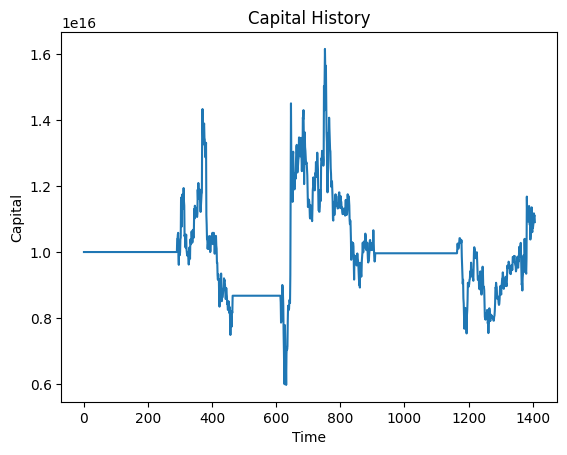

초기 자본금: 10000000000000000
최종 자본금: 10908642154275550
수익률: 9.09%


In [ ]:
result_profit(df_esn_1, 'ESN')